1. Analysis of FIFA Stats

  Spring 2025 Data Science Project

  Group Members: \\
  Ayush Joshi \\
  Andy Sun \\
  Ashwin Subbu \\
  Adarsa Pedada \\
  Kristopher Stoichkov \\
  Richard Suwanto \\

Contributions:
- Ayush worked on the analysis between defensive work rate and strength with Kris. They worked on getting the graphs to visualize the relationship between these two attributes. Ayush worked on creating the tutorial. He wrote extra information that made it look more like a tutorial instead of a report.
- Andy helped clean data and worked on the code to find correlation between vision and aggression. Designed and trained/tested ML algorithm for predicting match outcomes based on average team player ratings.
- Ashwin helped with data cleaning and preprocessing, worked on the tutorial formatting, helped come up with ideas and developing for hypothesis testing/Data Exploration, and helped determine conclusions based on data and analyzing ML results.
- Adarsa wrote the introduction section and helped with tutorial. Helped brainstorm ideas for data exploration and helped draw conclusions
- Kristopher came up with the project idea. Converted the sqltile file into multiple csv files, performed the t-test on sprint speed and acceleration and the graph associated with it. Did the prediction on overall, and the predicted vs actual comparison graph. And the conclusions on the associated graphs and tests.
-  Richard wrote the conclusion and made insights of the project. Worked on data exploration and looked at p-value correlations such as Vision & Aggression.

<h1 style="font-size: 25px;"><b>Introduction</b></h1>
  
Soccer, the world’s most popular sport, captivates millions with its fluid dynamics, strategic depth, and unpredictable outcomes. However, plenty of data lies beneath the surface of every match and individual player’s performance, which can help tell a deeper story. In a sports era where data science and analytics change the scene, soccer offers an ideal playground for analysis and prediction.

For our project, we will use the European Soccer Database from Kaggle, which can be found here: https://www.kaggle.com/datasets/hugomathien/soccer. This data includes information on over 25,000 matches and 10,000 players across multiple European leagues. Every player brings a unique set of attributes: speed, strength, vision, aggression, and more. But how do these attributes relate to one another? Are older players slower? Do more aggressive players lack vision? These are some of the questions we will use for the first part of our data exploration.

After we uncover relationships within individual data points, we will shift our focus to prediction. Can we use these attributes to predict overall player rating? Building off of this, can we extend this idea to teams and predict match outcomes based on ratings of players on each team? To answer these questions, we will develop and train two machine learning models: one to predict player ratings based on attributes, and one to predict the outcome of matches based on player ratings on respective teams.

As with all predictive modeling, we will face some constraints, such as simplified assumptions and the challenge of modeling a sport that is influenced by countless intangible factors. Regardless, our goal is not to perfectly predict every rating or every game. Rather, understanding how a data-driven approach can help us attempt to answer these questions.





<h1 style="font-size: 25px;"><b>Part 1: Data Collection</b></h1>

In this section we will collect all the necessary data and import libraries needed to perform the analysis. We need a dataset that contains information about soccer teams and players in order to get the best possible results from our analysis. Searching through Kaggle we found a dataset containing soccer data including over 25,000 matches and 11,000 players. It contains player attributes like strength, speed, aggression, etc. These attributes were obtained from EA Sports' FIFA games which we can use to quantify player stats. We wanted to observe relationships between different player attributes using different statistical tests and also determine how player stats can determine the outcome of a game.

This is our Dataset:
https://www.kaggle.com/datasets/hugomathien/soccer

The tables we will be using are:

**Match** - Information about over 25,000+ matches over 8 years including number of goals scored by home and away and betting odds for each team.

**Player** - Information about each player including birthdate, height, and weight.

**Player_Attributes** - Information about each player's skills including speed, vision, strength.

**Team** - Information about each Team including team name and abbreviation.

**Team_Attributes** - Quantified stats about each team including buildup speed and defensive aggression.

To start we need to import all necessary libraries, we will use pandas dataframes to hold data that needs to be cleaned and analyzed. Sklearn's functions will be used for most data analysis. Matplotlib will be used for data visualization leveraging their graphing functions.

3. Data Curation:
In the first step we need to get data. Like I mentioned earlier, we used a database of soccer players and their attributes. The raw data is inside a SQLLite database. In order to analyze this data we first need to convert different tables from that database into different CSV files.
Here are the libraries we will need to use.
Some important ones are:

  [pandas](https://pandas.pydata.org/) - for data manipulation

  [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) - for different statistical models and functions

  [sklearn](https://scikit-learn.org/stable/) - for ML stuff


In [ ]:
import sqlite3
import pandas as pd
import csv
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np

Lets start by opening a connecting to our database. The cursor object lets use SQL commands.

To speed up the import process our first step is to import each table separately to a CSV first. This code writes each table as a CSV which will later be imported as a pandas dataframe.

We use connect to the sqllite file using sqlite3 and use a writer to write the sql table to csv.

This creates 7 csv tables that we can import using pandas later in the code, although we will only be using 5 during this process.


In [ ]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table_name in tables:
    table = table_name[0]
    cursor.execute(f"SELECT * FROM {table}")
    rows = cursor.fetchall()
    column_names = [description[0] for description in cursor.description]
    with open(f"{table}.csv", "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(column_names)
        writer.writerows(rows)

    print(f"Exported {table} to {table}.csv")

conn.close()


Exported sqlite_sequence to sqlite_sequence.csv
Exported Player_Attributes to Player_Attributes.csv
Exported Player to Player.csv
Exported Match to Match.csv
Exported League to League.csv
Exported Country to Country.csv
Exported Team to Team.csv
Exported Team_Attributes to Team_Attributes.csv


So now that we got all our data, can we start to mess around with it? Not just yet. We still need to clean it up. There are lots of missing data points, data ,might be in a format that is difficult to modify, and just generally make it cleaner and easier to work with. Lets get started.

We can import the tables using pandas read functions to convert them into a dataframe. Pandas read_csv is a useful function for this step as we can quickly and efficiently import the Player and Player Attributes tables into player_df and player_attributes_df.


In [ ]:
player_df = pd.read_csv("Player.csv")
player_attributes_df = pd.read_csv("Player_Attributes.csv")
print(player_df.head(10))
print(player_attributes_df.head(10))

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   
5   6          27316          Aaron Hunt              158138   
6   7         564793          Aaron Kuhl              221280   
7   8          30895        Aaron Lennon              152747   
8   9         528212        Aaron Lennox              206592   
9  10         101042       Aaron Meijers              188621   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  
5  1986-09-04 00:00:00  182.88     161  
6  1996-

<h1 style="font-size: 25px;"><b>Part 2: Data Cleaning</b></h1>

Now that we have the two dataframes we need for exploratory data analysis, we need to process the data and clean irregular values.

One test we want to conduct is to compare age and its relation to a player's speed. We need to calculate player ages given their birthdate.

We need to calculate ages based on birthday and the most recent date in the player_attributes_df, to get the most up to date values for the player attributes. We want to convert the date value to a pandas datetime so we can convert all birthdate values to a common format which will be easier to analyze later. We utilize pandas to_datetime function to convert birthday values to pandas datetime format. Now we can subtract the date the data was collected to the birthday to get the age. We add this to the player_df containing general player information.


In [ ]:
player_df['birthday'] = pd.to_datetime(player_df['birthday'])
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])
latest_dates = player_attributes_df.groupby('player_api_id')['date'].max().reset_index()
player_df = player_df.merge(latest_dates, on='player_api_id', how='left')
player_df['age'] = (((player_df['date'] - player_df['birthday']).dt.days)/365.25).astype(int)
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2016-02-18,23
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,26
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,2016-01-07,24
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,2016-04-21,33
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,2015-12-24,36


<h1 style="font-size: 25px;"><b>Part 3: Data Exploration</b></h1>

1st: comparing age and speed/acceleration

We also need to fill in any potential missing data points. Here we group by players and use forward and backward fill to fill gaps.


In [ ]:
grouped_players = player_attributes_df.groupby('player_api_id')[['sprint_speed', 'acceleration']]
filled = grouped_players.transform(lambda x: x.ffill().bfill())
player_attributes_df[['sprint_speed', 'acceleration']] = filled[['sprint_speed', 'acceleration']]


Now we merge the attributes into player data, grabbing the most recent sprint speed and acceleration values for each player. We then add them to the dataframe.

This fills in any missing values using preexisting data from the sprint speed and acceleration associated to the player_api_id in the player_attributes_df

In [ ]:
most_recent_attributes = pd.merge(
    latest_dates,
    player_attributes_df,
    on=['player_api_id', 'date'],
    how='left'
)
most_recent_attributes = most_recent_attributes[['player_api_id', 'acceleration', 'sprint_speed']]
player_df = player_df.merge(most_recent_attributes,on='player_api_id', how='left')
player_df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,age,acceleration,sprint_speed
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2016-02-18,23,60.0,64.0
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,26,79.0,78.0
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,2016-01-07,24,77.0,74.0
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,2016-04-21,33,33.0,34.0
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,2015-12-24,36,33.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...
11059,11071,26357,Zoumana Camara,2488,1979-04-03,182.88,168,2015-03-06,35,53.0,63.0
11060,11072,111182,Zsolt Laczko,164680,1986-12-18,182.88,176,2014-09-18,27,69.0,68.0
11061,11073,36491,Zsolt Low,111191,1979-04-29,180.34,154,2011-02-22,31,71.0,73.0
11062,11074,35506,Zurab Khizanishvili,47058,1981-10-06,185.42,172,2011-02-22,29,66.0,66.0


Perfect! We are now ready to analyze our data.

4. Exploratory Data Analysis:
  Now lets actually explore our data and try to find patterns or correlations between the data.
Lets see if age affects spring speed and acceleration in players. Does getting older cause your agility to suffer?

Real quick, lets go over null hypotheses and hypothesis testing.
The null hypothesis states that there is no relationship between the data groups. So here, we would say that the null hypothesis is that age does not affect spring speed and acceleration.
The alternative hypotehsis states that there is a relationship. The alternative hypothesis here is that there is a relationship between age and spring speed/acceleration.

After performing a statistical test, we get a p-value. This gives the probability of observing your data point if the null hypothesis is true.
So if the p-value is above a significant value (i.e. 0.05) we would reject the null hypothesis.
We will use a two-sample t-test to compare 2 age groups which are split by median age.

H0: Aging does not have an affect on sprint speed and acceleration

HA: Aging does have an affect on sprint speed and acceleration

In [ ]:
median_age = player_df['age'].median()
younger_sprint = player_df[player_df['age'] <= median_age]['sprint_speed']
older_sprint = player_df[player_df['age'] > median_age]['sprint_speed']
younger_acceleration = player_df[player_df['age'] < median_age]['acceleration']
older_acceleration = player_df[player_df['age'] >= median_age]['acceleration']
t_stat_sprint, p_val_sprint = stats.ttest_ind(younger_sprint, older_sprint, equal_var=False)
print(f"T-test comparing sprint speed by median age split:")
print(f"t = {t_stat_sprint}, p = {p_val_sprint}")
t_stat_accel, p_val_accel = stats.ttest_ind(younger_acceleration, older_acceleration, equal_var=False)
print(f"T-test comparing acceleration by median age split:")
print(f"t = {t_stat_accel}, p = {p_val_accel}")


T-test comparing sprint speed by median age split:
t = 32.73943133562486, p = 5.164817364437577e-224
T-test comparing acceleration by median age split:
t = 30.213665807005313, p = 1.051149822642087e-192


We filtered the spring speed and acceleration for both groups.
After that, we use a t-test to check if the mean spring speed differs between age groups.
We also do the same test for acceleration.

Based on the p values of t-test done on the sprint speed and acceleration of the two groups one at the median age or younger and another older than the median age, we should reject the null hypothesis.

Now we can plot boxplots with the [seaborn](https://seaborn.pydata.org/) library.



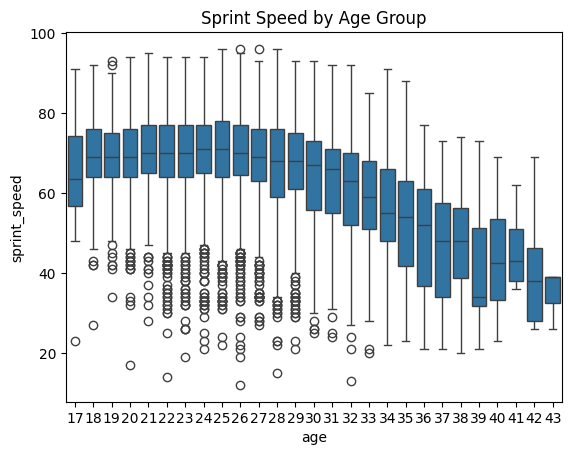

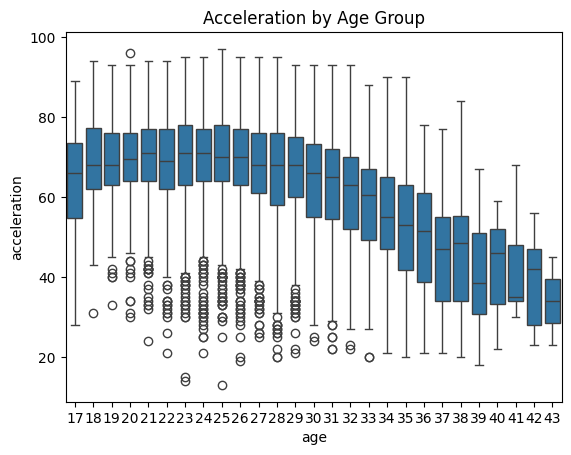

In [ ]:
sns.boxplot(x='age', y='sprint_speed', data=player_df)
plt.title('Sprint Speed by Age Group')
plt.show()

sns.boxplot(x='age', y='acceleration', data=player_df)
plt.title('Acceleration by Age Group')
plt.show()


There are a lot of outliers in the sprint speed and acceleration of younger age groups, not having any outliers past the age of 33.

Now lets see if there is any correlation between a player's vision and aggression. To give some background, higher vision means that players are able to "see" the field better. Essentially players with high vision can make better passes.

The aggression stat determines how "aggressive" you are on the field. PLayers with a high aggression stat are stronger and tend to make aggresive plays on both offense and defense. However, they are also more likely to get penalties.

2nd: vision and aggression

Lower than alpha


'pvalue is 3.26e-80'

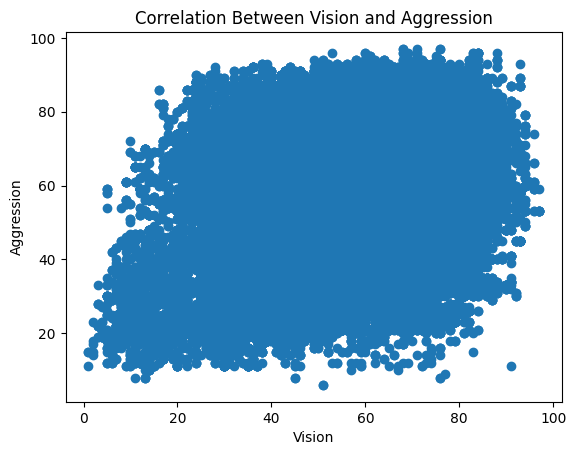

In [ ]:
grouped_players3 = player_attributes_df.groupby('player_api_id')[['vision', 'aggression']]
filled3 = grouped_players3.transform(lambda x: x.ffill().bfill())
player_attributes_df[['vision', 'aggression']] = filled3[['vision', 'aggression']]

plot1 = plt.scatter(player_attributes_df["vision"], player_attributes_df["aggression"])
spearman = stats.spearmanr(player_attributes_df["vision"], player_attributes_df["aggression"])
spearman_pvalue = spearman.pvalue
if spearman_pvalue > 0.05:
    print("Higher than alpha")
else:
    print("Lower than alpha")

pvalue = 3.26e-80
display(f"pvalue is {pvalue}")

plt.xlabel("Vision")
plt.ylabel("Aggression")
plt.title("Correlation Between Vision and Aggression")
plt.show()

HO: Players vision does not have an effect on their aggressiveness.

HA: Players vision does have an effect on their aggressiveness.

When looking at the p-value of the Spearman graph, we end up with a number lower than the alpha (0.05). Therefore, we reject the null hypothesis.

When looking at the graph and the r-value correlation, you can see there is a slight negative correlation between the player's aggression and vision.
The correlation exists, but it is not strong. However, to some extent, players with lower vision may tend to be more aggressive than those who have better vision.

For our last part, we compared strength and defensive work rate.

3rd: compare strength and defensive_work_rate

In [ ]:
grouped_players_2 = player_attributes_df.groupby('player_api_id')[['defensive_work_rate', 'strength']]
filled_2 = grouped_players_2.transform(lambda x: x.ffill().bfill())
player_attributes_df[['defensive_work_rate', 'strength']] = filled_2[['defensive_work_rate', 'strength']]


most_recent_workrates = pd.merge(
    latest_dates,
    player_attributes_df,
    on=['player_api_id', 'date'],
    how='left'
)
most_recent_workrates = most_recent_workrates[['player_api_id', 'defensive_work_rate', 'strength']]
player_df = player_df.merge(most_recent_workrates,on='player_api_id', how='left')
player_df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,age,acceleration,sprint_speed,defensive_work_rate,strength
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2016-02-18,23,60.0,64.0,medium,76.0
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,26,79.0,78.0,medium,56.0
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,2016-01-07,24,77.0,74.0,medium,71.0
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,2016-04-21,33,33.0,34.0,medium,90.0
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,2015-12-24,36,33.0,31.0,medium,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,11071,26357,Zoumana Camara,2488,1979-04-03,182.88,168,2015-03-06,35,53.0,63.0,medium,76.0
11068,11072,111182,Zsolt Laczko,164680,1986-12-18,182.88,176,2014-09-18,27,69.0,68.0,medium,69.0
11069,11073,36491,Zsolt Low,111191,1979-04-29,180.34,154,2011-02-22,31,71.0,73.0,_0,68.0
11070,11074,35506,Zurab Khizanishvili,47058,1981-10-06,185.42,172,2011-02-22,29,66.0,66.0,_0,67.0


H0 -- > no correlation between strength and defensive work rate.
Ha -- > There is a correlation between strength and defensive work rate.
We use the anova test as there are 3 groups, high, medium, and low for defensive work rate.

In [ ]:
high_df = player_df[player_df['defensive_work_rate'] == 'high']
medium_df = player_df[player_df['defensive_work_rate'] == 'medium']
low_df = player_df[player_df['defensive_work_rate'] == 'low']

low_strength = low_df['strength']
medium_strength = medium_df['strength']
high_strength = high_df['strength']

stat, pval = stats.f_oneway(low_strength, medium_strength, high_strength)
print(f"F-test comparing strength by defensive work rate:")
print(f"F = {stat}, p = {pval}")



result = stats.tukey_hsd(low_strength, medium_strength, high_strength)
print("POST-HOC TEST:", result)

F-test comparing strength by defensive work rate:
F = 186.44488705740156, p = 3.2643737455450335e-80
POST-HOC TEST: Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.345     0.001    -2.236    -0.455
 (0 - 2)     -7.188     0.000    -8.264    -6.111
 (1 - 0)      1.345     0.001     0.455     2.236
 (1 - 2)     -5.842     0.000    -6.593    -5.092
 (2 - 0)      7.188     0.000     6.111     8.264
 (2 - 1)      5.842     0.000     5.092     6.593



As we can see, we have a very low p-value, so we reject the null hypothesis. This means that there is a strong correlation between strength and defensive work rate.

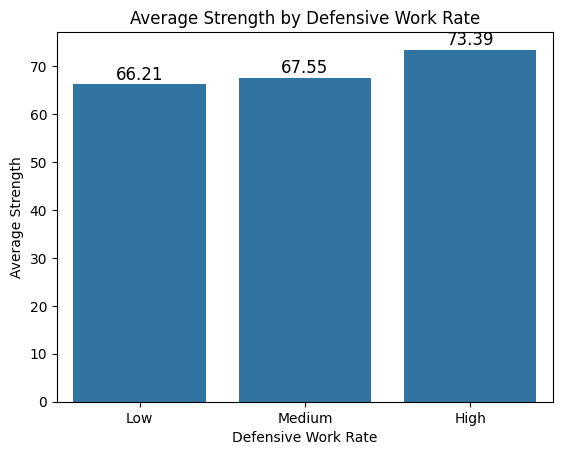

In [ ]:

# Calculate mean strength for each defensive work rate category
strength_means = {
    "Low": low_strength.mean(),
    "Medium": medium_strength.mean(),
    "High": high_strength.mean()
}

sns.barplot(x=list(strength_means.keys()), y=list(strength_means.values()))

plt.xlabel("Defensive Work Rate")
plt.ylabel("Average Strength")
plt.title("Average Strength by Defensive Work Rate")

for i, v in enumerate(strength_means.values()):
    plt.text(i, v + 1, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


From the graph, the higher the defensive work rate, the higher the average strength. This follows with the hypothesis test.

**Machine Learning**
Now lets use some machine learning to make predictions based off our data.

Let's try and predict a player's overall rating based on their physical and technical attributes, based on their age and potential. We will use a [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). To give a brief explanation, random forest regressor is a ML model that works by having multiple decision trees. Each tree is trained on a random subset of the data and makes a prediction. At the end, the model takes the average all tree predictions and uses that as its final prediction

To start we need to sort the player attribute data by date and then merge birthdays into player_attributes_df. This way we can get a player's age later.

Next we can get a list of player attributes that we want to include in our ML model. Here we grab attributes that affect overall rating. We use forward and backward fill to handle any missing values in our data.

After calculating age at every data point(as there are multiple data points per player showing a progression through the different FIFA games) and removing the overall_rating, because that is what we want to predict, we can setup the model. We split the data into training and testing sets and then run the random forest model. We predict the ratings using the test set and compute the mean squared error and root mean squared error. From the values we get below for the mean squared error and root mean squared error we determine that the overall rating only varies by about 1 from what we expected to get.

In [ ]:
player_attributes_df = player_attributes_df.sort_values(by=['player_api_id', 'date'])
player_attributes_df = player_attributes_df.merge(
    player_df[['player_api_id', 'birthday']],
    on='player_api_id',
    how='left'
)

In [ ]:
col_names = ['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
grouped_players = player_attributes_df.groupby('player_api_id')[col_names]
filled = grouped_players.transform(lambda x: x.ffill().bfill())
player_attributes_df[col_names] = filled[col_names]
player_attributes_df['age'] = (((player_attributes_df['date'] - player_attributes_df['birthday']).dt.days)/365.25).astype(int)
features =  ['age', 'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [ ]:
X = player_attributes_df[features]
y = player_attributes_df['overall_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = mse ** 0.5
print(f'RMSE: {rmse}')


MSE: 1.0133867800879777
RMSE: 1.0066711380028621


This graph shows the importance of each feature for determining the overall rating of a player, this function quantifies each feature's importance by how much it decreases the model's impurity overall. From the graph we can see that reactions, potential, and age are deemed important by the model.

Top 10 attributes by mean decrease in impurity:
reactions           0.438206
potential           0.271259
age                 0.123412
ball_control        0.038513
standing_tackle     0.018914
marking             0.009041
heading_accuracy    0.007889
gk_positioning      0.005864
finishing           0.005651
positioning         0.005457
dtype: float64


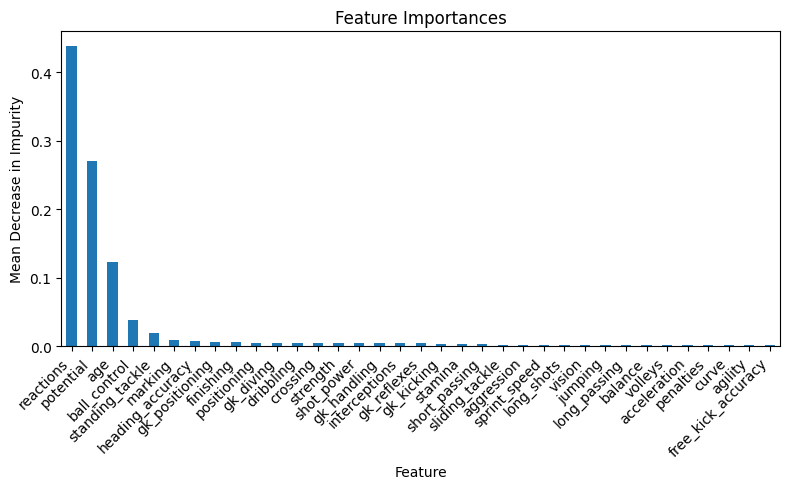

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

print("Top 10 attributes by mean decrease in impurity:")
print(importances.head(10))

plt.figure(figsize=(8, 5))
importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
comparison_df = X_test.copy()
comparison_df['actual'] = y_test
comparison_df['predicted'] = y_pred

This graph shows the accuracy of our prediction on players reaching their ability year by year. For this graph we can see that the predicted overall is relatively close for most data points.


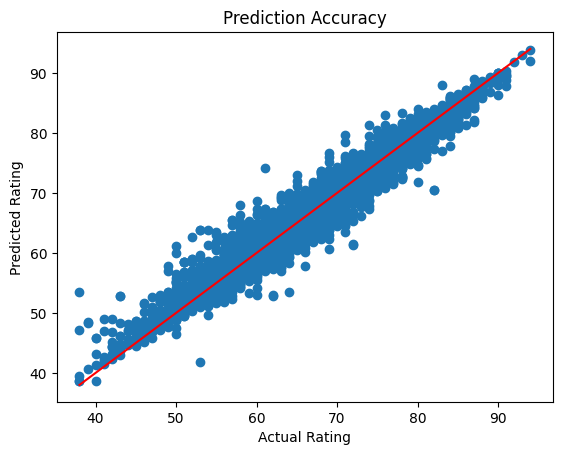

In [ ]:
plt.scatter(comparison_df['actual'], comparison_df['predicted'])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Prediction Accuracy')
plt.show()

**Predicting match outcomes based on each teams average player rating**  
First we need to establish and clean up the match data.

In [ ]:
match_df = pd.read_csv("Match.csv")
match_df['date'] = pd.to_datetime(match_df['date'])

We can create a subset of the match data with only the features we are going to use. In this case we need the id, date, api id of each team, the number of goals for the home and away teams, and the player ids of the players from each team.

In [ ]:
home_player_cols = [f'home_player_{i}' for i in range(1, 12)]
away_player_cols = [f'away_player_{i}' for i in range(1, 12)]

match_subset = match_df[['id', 'date', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal'] + home_player_cols + away_player_cols]

Many of the matches may be missing information on some of the players. We don't necessarily want to get rid of matches with a single player missing but let's filter out matches with more than 2 players missing from either team and see what that leaves us with.

In [ ]:
missing_home = match_subset[home_player_cols].isnull().sum(axis=1)
missing_away = match_subset[away_player_cols].isnull().sum(axis=1)

match_subset = match_subset[(missing_home <= 2) & (missing_away <= 2)].copy()

print(f"Matches after filtering: {len(match_subset)}")

Matches after filtering: 24185


Thankfully there still seems to be a good number of matches to work with.

To make things easier for when we get team ratings, we can create two new columns in match_subset containing lists of the player ids from each team.

In [ ]:
match_subset['home_players'] = match_subset[home_player_cols].values.tolist()
match_subset['away_players'] = match_subset[away_player_cols].values.tolist()

player_ratings = player_attributes_df[['player_api_id', 'date', 'overall_rating']].dropna()



Each player can show up multiple times in this dataset since their performance and ratings have likely changed throughout the years. Logically we would want to predict the results of a match based on the stats of each teams players at the time. To do this we can first create a dictionary containing each players rating history. Then when we later retrieve each player's ratings to calculate average team ratings, we can find their most recent rating before the match.

In [ ]:
from collections import defaultdict

player_rating_history = defaultdict(list)

for _, row in player_ratings.iterrows():
    player_rating_history[row['player_api_id']].append((row['date'], row['overall_rating']))

for player in player_rating_history:
    player_rating_history[player].sort()

def get_team_rating(player_ids, match_date):
    ratings = []
    for pid in player_ids:
        if pid not in player_rating_history:
            continue

        past_ratings = [r for d, r in player_rating_history[pid] if d <= match_date]
        if past_ratings:
            ratings.append(past_ratings[-1])
    if ratings:
        return np.mean(ratings)
    else:
        return np.nan

match_subset['home_team_rating'] = match_subset.apply(
    lambda row: get_team_rating(row['home_players'], row['date']), axis=1)

match_subset['away_team_rating'] = match_subset.apply(
    lambda row: get_team_rating(row['away_players'], row['date']), axis=1)

The match dataset doesn't actually have a column telling us which team won, but they do provide the number of goals scored by each team. We can use this to determine if the home or away team won. We'll say the away team won any draws since the home team should've done better.

In [ ]:
def match_result(home_goals, away_goals):
    if home_goals > away_goals:
        return 1
    else:
        return 2

match_subset['result'] = match_subset.apply(
    lambda row: match_result(row['home_team_goal'], row['away_team_goal']), axis=1)

Let's also add a column with the difference between the two teams average player rating for good measure

In [ ]:
match_subset['rating_diff'] = match_subset['home_team_rating'] - match_subset['away_team_rating']

New we can start building our model. Our input features are the home teams average rating, the away teams average rating, and the difference between the two. Our Target is the result of the match.

Train size: (19348, 3)
Test size: (4837, 3)
Class distribution in train set:
result
2    0.542588
1    0.457412
Name: proportion, dtype: float64
Accuracy: 0.6452
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.52      0.57      2213
           2       0.65      0.75      0.70      2624

    accuracy                           0.65      4837
   macro avg       0.64      0.64      0.63      4837
weighted avg       0.64      0.65      0.64      4837

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


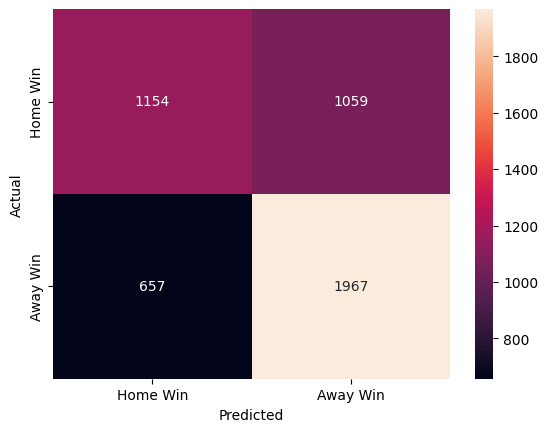

In [ ]:
features = match_subset[['home_team_rating', 'away_team_rating', 'rating_diff']].dropna()
labels = match_subset.loc[features.index, 'result']

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Class distribution in train set:")
print(y_train.value_counts(normalize=True))

model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Home Win', 'Away Win'], yticklabels=['Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We got an overall accuracy and individual precisions of around 64 percent. This might not seem very high, but for a highly variable result this is actually pretty good. Rather than each team having and equal chance of winning, this suggests there is a distinct influence player rating has over the match result.

**Final Thoughts**

With all our data we can now always determine which team will win! Right? Well, not exactly.

Our results from the graphs are not as straight forward as we want it to be. This is because there are many factors within teams and players that can influence a prediction of a match. While going through our data and making insights there are a couple things we noticed to look out for when predicting performances.

1. When looking at player attributes to determine player ratings, we have realized there is a significant relationship between a player's age and their attributes, of which using **T-tests**, we displayed speed and acceleration. In both of these graphs, the variance as age goes up decreases (less outliers), further reinforcing the idea that age is very important and impacts players attributes, possibly lowering their rating due to age. Therefore, younger players will typically perform better than older players no matter what, making age a big factor to player rating.

2. Some unexpected things we noticed were some data not having strong correlations such as vision and aggressiveness. While exploring data, such as the correlation of vision and aggressiveness, our p-value is incredibly low meaning there was a strong correlation, yet the graph shows otherwise. We were confused but unfortunately some data results in this and, for us, will not play a huge role in determining player rating nor an outcome of a game.

3. When looking at the graph focusing on the correlation between Average Strength and Defensive Work Rate, teams consisted of players in defensive roles being significantly stronger than non defensive roles. Therefore it is important to think about how teams are set up, as it seems popular to have stronger players on the defense. This may be because those with low defense may have higher agility or other skills.

We also need to keep in mind our model may not be fully right as our feature importances displays reactions, potential, and age as the most important traits which was definitely unexpecting. However, when we thought about it we realize that these three traits are more universal, while other traits are more role dependent. Regardless, we also assume our model is pretty inaccurate as some stats such as speed and agility are at the bottom, which while not as important, can influence how a player performs.

Our model does not take into account player roles and positioning and is more generalized by taking player stats at face value. In future models we want to take these into consideration and ideally get more accurate results.

Overall, while needing some refinements, our machine learning model can be used as a guide to help determine which team will perform the best. While not fully accurate, it is a good baseline as our model tries its best to give reasonable odds using player attributes and ratings of players in each team.